# Make a map of universities in the USA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [8]:
df = pd.read_csv('../data/raw/MERGED2020_21_PP.csv', usecols=['INSTNM', 'ZIP', 'LATITUDE', 'LONGITUDE', 'UGDS'], low_memory=False)
df = df.dropna()
df = df[df['UGDS'] > 3000]
df

,INSTNM,ZIP,LATITUDE,LONGITUDE,UGDS
0,Alabama A & M University,35762,34.783368,-86.568502,5090.0
1,University of Alabama at Birmingham,35294-0110,33.505697,-86.799345,13549.0
3,University of Alabama in Huntsville,35899,34.724557,-86.640449,7825.0
4,Alabama State University,36104-0271,32.364317,-86.295677,3603.0
5,The University of Alabama,35487-0100,33.211875,-87.545978,30610.0
...,...,...,...,...,...
5790,Clovis Community College,93730,36.886860,-119.731261,7115.0
5799,Purdue University Global,47906,39.918440,-86.109501,32296.0
5860,Purdue University Northwest,46323,41.584324,-87.474236,7184.0
5962,Indiana Institute of Technology-College of Pro...,46803,41.076613,-85.115424,3646.0


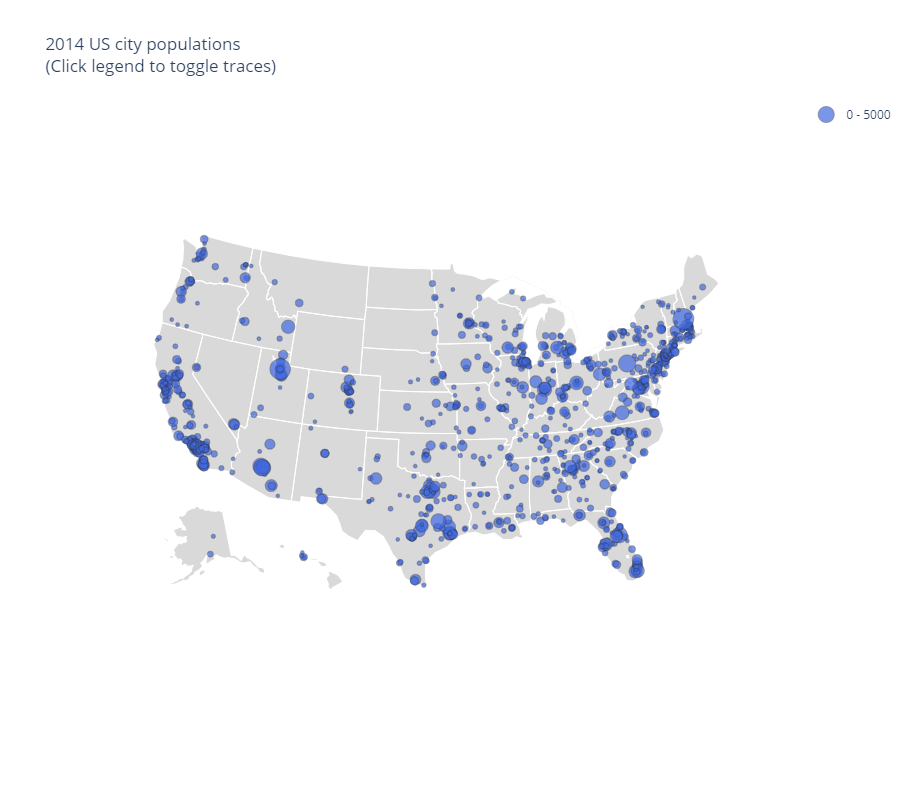

In [9]:
df['text'] = df['INSTNM'] + ' ' + df['UGDS'].astype(str)
limits = [(0,5000),(5001,10000),(10001,15000),(15001,20000),(20001,100000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 500

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['LONGITUDE'],
        lat = df_sub['LATITUDE'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['UGDS']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        width=800,
        height=800,
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.update_layout(
    width=800,
    height=800
)

fig.show()